# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url=f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | filadelfia
Processing Record 3 of Set 1 | micheweni
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | piacabucu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | pervomayskoye
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | vorgashor
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | zhumysker
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | ne

Processing Record 39 of Set 4 | xilin hot
Processing Record 40 of Set 4 | tazacorte
Processing Record 41 of Set 4 | tshabong
Processing Record 42 of Set 4 | dhidhdhoo
Processing Record 43 of Set 4 | kill devil hills
Processing Record 44 of Set 4 | hamina
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | hegang
Processing Record 48 of Set 4 | yuzhno-kurilsk
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | shenjiamen
Processing Record 1 of Set 5 | elverum
Processing Record 2 of Set 5 | banjarmasin
Processing Record 3 of Set 5 | turbo
Processing Record 4 of Set 5 | qamdo
Processing Record 5 of Set 5 | yoloten
Processing Record 6 of Set 5 | cabimas
Processing Record 7 of Set 5 | rye
Processing Record 8 of Set 5 | alma
Processing Record 9 of Set 5 | usogorsk
Processing Record 10 of Set 5 | vernon
Processing Record 11 of Set 5 | santo antonio
Processing Record 12 of Set 5 | globe
City 

Processing Record 33 of Set 8 | pibor
City not found. Skipping...
Processing Record 34 of Set 8 | avarua
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | paracuru
Processing Record 37 of Set 8 | midvagur
Processing Record 38 of Set 8 | brookings
Processing Record 39 of Set 8 | adh dhibiyah
City not found. Skipping...
Processing Record 40 of Set 8 | san patricio
Processing Record 41 of Set 8 | ivdel'
Processing Record 42 of Set 8 | labuan
Processing Record 43 of Set 8 | christchurch
Processing Record 44 of Set 8 | al majaridah
Processing Record 45 of Set 8 | blackwater
Processing Record 46 of Set 8 | urk
Processing Record 47 of Set 8 | lekki
City not found. Skipping...
Processing Record 48 of Set 8 | vilyuysk
Processing Record 49 of Set 8 | guatire
Processing Record 0 of Set 9 | tianchang
Processing Record 1 of Set 9 | murzuq
Processing Record 2 of Set 9 | vondrozo
Processing Record 3 of Set 9 | cherdyn'
Processing Record 4 of Set 9 | kimbe
Processing Record 5 of Se

Processing Record 23 of Set 12 | aykol
City not found. Skipping...
Processing Record 24 of Set 12 | stony hill
Processing Record 25 of Set 12 | miandrivazo
Processing Record 26 of Set 12 | ugoofaaru
Processing Record 27 of Set 12 | ribeira brava
Processing Record 28 of Set 12 | la'ie
Processing Record 29 of Set 12 | hayma'
City not found. Skipping...
Processing Record 30 of Set 12 | mersing
Processing Record 31 of Set 12 | sinabang
Processing Record 32 of Set 12 | castelli
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | kangding
Processing Record 35 of Set 12 | reichenbach/vogtland
Processing Record 36 of Set 12 | belyy yar
Processing Record 37 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 38 of Set 12 | zheleznodorozhnyy
Processing Record 39 of Set 12 | miyanoura
City not found. Skipping...
Processing Record 40 of Set 12 | katabu
Processing Record 41 of Set 12 | camana
Processing Record 42 of Set 12 | moyynkum
Processing Record 43 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,filadelfia,39.9523,-75.1638,15.90,69,56,2.20,US,1683432184
1,micheweni,-4.9667,39.8333,25.67,82,24,3.43,TZ,1683432382
2,tiksi,71.6872,128.8694,-12.22,76,95,3.33,RU,1683432382
3,margaret river,-33.9500,115.0667,17.88,68,94,5.87,AU,1683432382
4,piacabucu,-10.4056,-36.4344,24.15,85,11,0.51,BR,1683432382


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,filadelfia,39.9523,-75.1638,15.90,69,56,2.20,US,1683432184
1,micheweni,-4.9667,39.8333,25.67,82,24,3.43,TZ,1683432382
2,tiksi,71.6872,128.8694,-12.22,76,95,3.33,RU,1683432382
3,margaret river,-33.9500,115.0667,17.88,68,94,5.87,AU,1683432382
4,piacabucu,-10.4056,-36.4344,24.15,85,11,0.51,BR,1683432382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

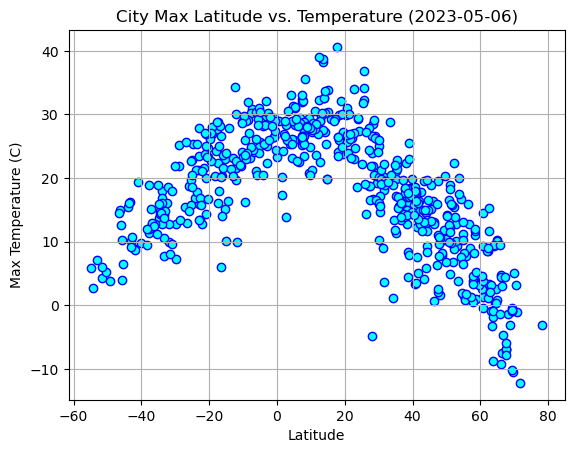

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", c = "#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-06)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

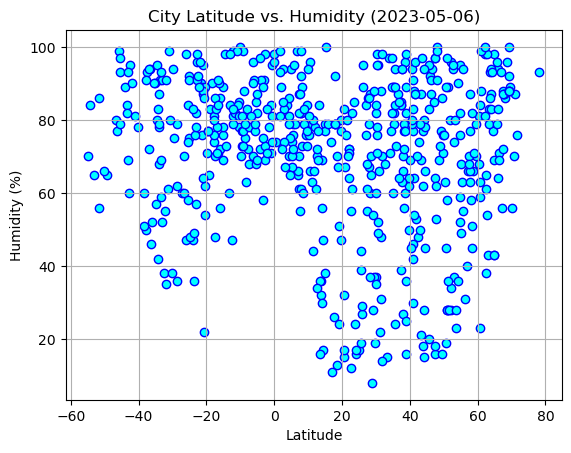

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", c ="#00FFFF", edgecolor = "b")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-06)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

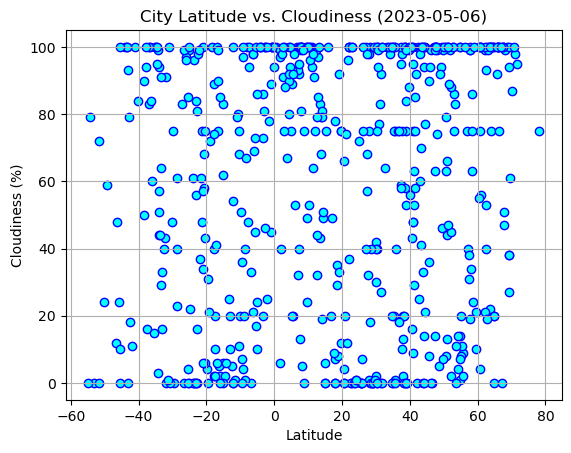

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-06)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

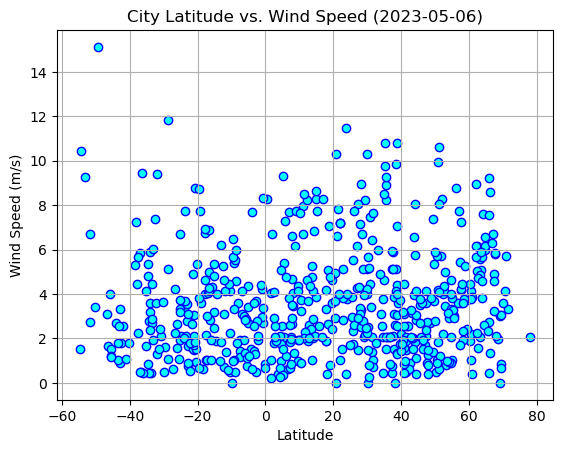

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-05-06)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y, marker = "o", c ="#00FFFF", edgecolor = "b")
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,filadelfia,39.9523,-75.1638,15.90,69,56,2.20,US,1683432184
2,tiksi,71.6872,128.8694,-12.22,76,95,3.33,RU,1683432382
5,albany,42.6001,-73.9662,12.23,74,25,0.89,US,1683432228
6,pervomayskoye,43.9190,46.7102,14.47,77,100,6.55,RU,1683432383
8,hamilton,39.1834,-84.5333,18.47,79,0,3.60,US,1683431746


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,micheweni,-4.9667,39.8333,25.67,82,24,3.43,TZ,1683432382
3,margaret river,-33.9500,115.0667,17.88,68,94,5.87,AU,1683432382
4,piacabucu,-10.4056,-36.4344,24.15,85,11,0.51,BR,1683432382
7,geraldton,-28.7667,114.6000,25.23,36,40,11.83,AU,1683431960
9,edinburgh of the seven seas,-37.0676,-12.3116,15.18,72,83,5.85,SH,1683432384


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.853540870633638


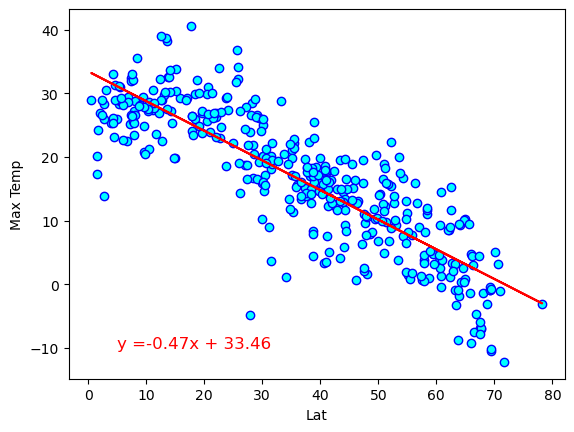

In [37]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(5,-10))

The r-value is: 0.7917366598317706


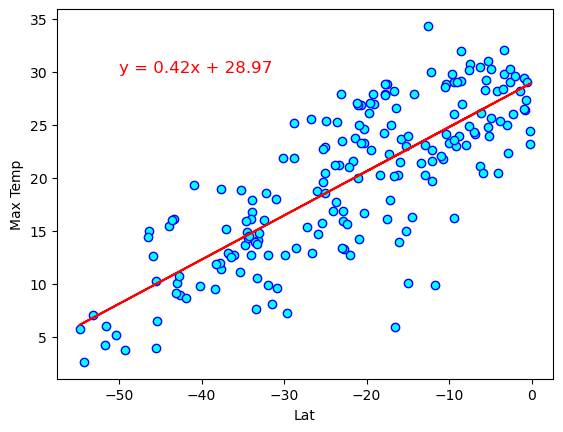

In [38]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-50,30))

**Discussion about the linear relationship:** There is a strong correlation between temperature and the distance to the equator. The northern hemisphere r value is negative due to the fact that the higher the latitude the lower the temperature. Whereas the southern hemisphere shows a positive r value due to the fact that the latitude is represented with negative numbers even though it is the same distance from the equator as the positive value in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05481658275636007


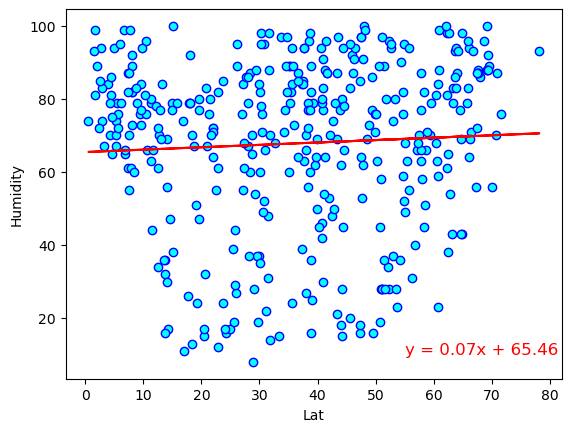

In [39]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (55, 10))

The r-value is: 0.13728619270327333


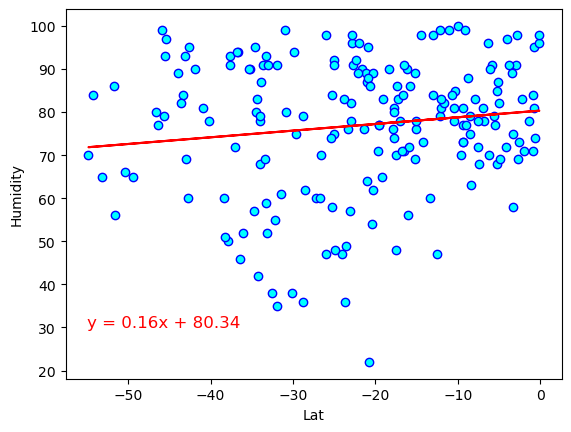

In [40]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 30))

**Discussion about the linear relationship:** The correlation between humidity and latitude is very weak for both the northern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02227914139978947


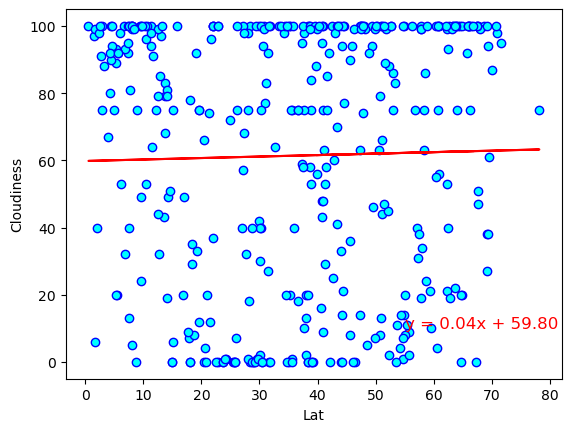

In [42]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55, 10))

The r-value is: 0.06421211607008347


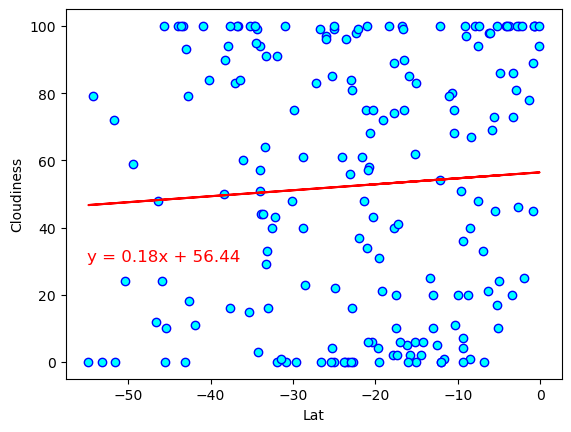

In [43]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-55, 30))

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is very week for both the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018695861897800405


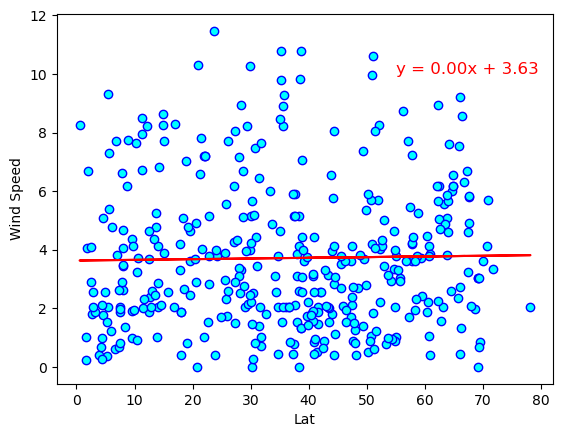

In [44]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (55, 10))

The r-value is: -0.13762093918393328


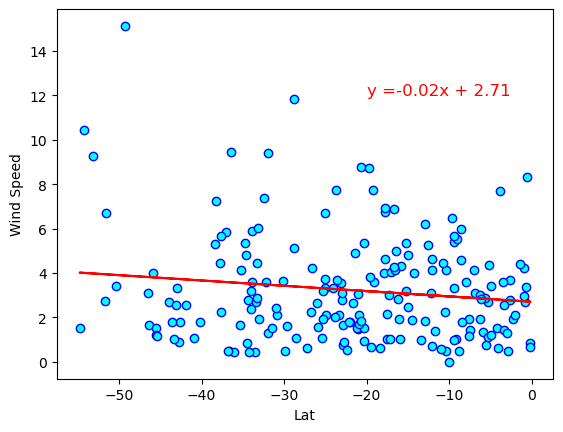

In [46]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-20, 12))

**Discussion about the linear relationship:** The correlation between wind speed and latitude for the northern hemisphere is very weak and for the southern hemisphere it is a little stronger but still weak. 